<a href="https://colab.research.google.com/github/ramkguru97/Assignment-5/blob/main/Preparing_Data_for_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 5 Preparing Data For Modeling assignment by Ramesh Gururajan
## Using the Churn dataset
## This practice solution follows coding conventions from the Larose text
## examples in Chapter 5 
<br>

In [7]:
#We are working with the Churn data set 

# import required package
import pandas as pd

# read the csv adult data using the pandas package
churn = pd.read_csv("churn")
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Intl Plan       3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [8]:
churn.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Old Churn,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,False


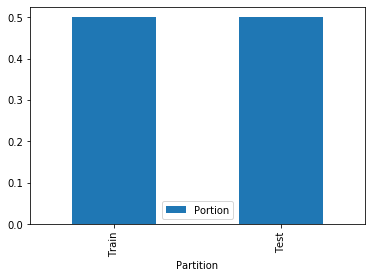

In [ ]:

#3:  Partition the data set, so that 67% of the records are included in the training data set and
# 33% are included in the test data set.
# Use a bar graph to confirm your proportions. 

# import required packages
from sklearn.model_selection import train_test_split
import random

# create partition
adult_train, adult_test = train_test_split(adult, test_size = 0.5, random_state = 7)

# collect proportion values in a dataframe 
df = pd.DataFrame({'Partition':['Train', 'Test'],
                   'Portion':[(adult_train.shape[0]/adult.shape[0]),
                              (adult_test.shape[0]/adult.shape[0])]
                   })
# create barplot
df.set_index('Partition').plot(kind='bar')


In [ ]:

# Question 22
# Identify the total number of records in the training data set, and how many records in the training data set have an income value of >50 K.  

print('The total number of records in the training dataset is', adult_train.shape[0])


print('There are', adult_train.loc[adult_train['income']=='>50K.'].shape[0], 'records in the training data set that have “>50K” income')



The total number of records in the training dataset is 12500
There are 2981 records in the training data set that have “>50K” income


In [ ]:

# Question 23
# Use your answers from the previous exercise to calculate how many records with income >50 K you need to resample in order to have 35% of the rebalanced data set have incomes of >50 K. 

# create variables needed to compute resampled record size
greater_50K_records = adult_train.loc[adult_train['income']=='>50K.'].shape[0]
total_records = adult_train.shape[0]

# determin portion size to ressample
portion_size = (0.35 * total_records - greater_50K_records) / 0.65
print('The portion size is ', portion_size)

The portion size is  2144.6153846153848


In [ ]:

# Question 24
# Perform the rebalancing described in the previous exercise and confirm that 35% of the records in the rebalanced data set have incomes >50 K. 

# subset the records to be resampled
to_resample = adult_train.loc[adult_train['income']=='>50K.']

# resample the '>50K' records to the determined sample size
our_resample = to_resample.sample(n = 2145, replace = True)

# concatenate the sampled data with the rest of the training data so that it's rebalanced
adult_train_rebal = pd.concat([adult_train, our_resample])
adult_train_rebal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14645 entries, 15055 to 9033
Data columns (total 15 columns):
age               14645 non-null int64
workclass         14645 non-null object
demogweight       14645 non-null int64
education         14645 non-null object
education-num     14645 non-null int64
marital-status    14645 non-null object
occupation        14645 non-null object
relationship      14645 non-null object
race              14645 non-null object
sex               14645 non-null object
capital-gain      14645 non-null int64
capital-loss      14645 non-null int64
hours-per-week    14645 non-null int64
native-country    14645 non-null object
income            14645 non-null object
dtypes: int64(6), object(9)
memory usage: 1.8+ MB


In [ ]:

# table proportion of income classes in training data
proportion_income_classes = adult_train_rebal['income'].value_counts() / adult_train_rebal.shape[0]
print('Proportion of incone classes in training data is ',proportion_income_classes)

Proportion of incone classes in training data is  <=50K.    0.649983
>50K.     0.350017
Name: income, dtype: float64


In [ ]:

# Question 25
# Which baseline model do we use to compare our classification model performance against? 
# To which value does this baseline model assign all predictions? 
# What is the accuracy of this baseline model? 

# The baseline is determined by looking at which income class has the greatest proportion of the data which is <=50K.
# If a model were to predict no >50K then the model would have an accuracy of 76% 
# Therefore the selected model would have to outperform this baseline model in order to have any use in the real world. 

baseline_value = adult_train['income'].value_counts() / adult_train.shape[0]
print('The baseline is ',baseline_value)

The baseline is  <=50K.    0.76152
>50K.     0.23848
Name: income, dtype: float64


In [ ]:

# Question 26
# Validate your partition by performing a two‐sample Z‐test for the difference in means for the mean age in the training set versus the mean age in the test set.

from numpy import sqrt, abs, round
from scipy.stats import norm
from statistics import stdev

n1 = adult_train.shape[0]
x1 = adult_train['age'].mean()
sd1 = stdev(adult_train['age'])

n2 = adult_test.shape[0]
x2 = adult_test['age'].mean()
sd2 = stdev(adult_test['age'])

# calculate the denominator pooled standard error
pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)

#calculate z value
z = round(((x1 - x2) - 0) /pooledSE,6)

# caluculate p-value
pval =  round(2*(1 - norm.cdf(abs(z))),6)

print('Z is ',z,'P value is ',pval)


Z is  0.039274 P value is  0.968672


In [ ]:

# Because the p-value > than alpha 0.05 the null hypothesis H0 is accepted.
# Meaning that there is not evidence of significant differences between the age in the train and test datasets 

# Question 27
# Validate your partition by performing a two‐sample Z‐test for the difference in proportions 
# for the proportion of >50 K records in the training set versus the proportion of >50 K records in the test set. 

n1 = adult_train.shape[0]
x1 = adult_train.loc[adult_train['income']=='>50K.'].shape[0]
p1 = x1 / n1

n2 = adult_test.shape[0]
x2 = adult_test.loc[adult_test['income']=='>50K.'].shape[0] 
p2 = x2 / n2

p = (x1+x2)/(n1+n2)

#calculate z value
z = round(((p1-p2)-0)/sqrt(p*(1-p)*(1/n1+1/n2)),6)

# caluculate p-value
pval =  round(2*(1 - norm.cdf(abs(z))),6)
print('Z is ',z,'P value is ',pval)



Z is  -0.32609 P value is  0.744356


In [ ]:

# Because the p-value > than alpha 0.05 the null hypothesis H0 is accepted.
# Meaning that there is not evidence of significant difference between the >50K income proportions in the training and test datasets 
#